In [1]:
setwd("G:\\My Drive\\SDM_China")
library("rstan")
library(gdata)
#library(bayesplot)
library(raster)
library(rgdal)
library(sp)
library(spdep)
library(data.table)

Warning message:
"package 'rstan' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.4.4"rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.
Warning message:
"package 'gdata' was built under R version 3.4.4"gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
g

In [118]:
### Load data on buckwheat production in China:
path2bw<-"data\\buckwheat_production\\clipped\\"
path2env <-"data\\environmental\\clipped\\"
### Get small dataset of China:
china<-readOGR(dsn = "raw_data\\CHN_adm", layer = "CHN_adm3")
bw_layers<-list.files(path=path2bw,pattern='tif$',full.names=TRUE)
env_layers<-list.files(path=path2env,pattern='tif$',full.names=TRUE)
bw<-stack(bw_layers)
env<-stack(env_layers)
### Change layer names to simpler ones
names(env) <- sub("wc2.0_bio_5m","BIO",names(env))

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\CHN_adm", layer: "CHN_adm3"
with 2409 features
It has 13 fields
Integer64 fields read as strings:  ID_0 ID_1 ID_2 ID_3 


In [ ]:
# Extract raster values to list object
r.vals <- extract(temperature,china )
# Calculates mean temperature across the polygon
r.mean <- unlist(lapply(r.vals, FUN=mean,na.rm=TRUE))
# Connect the data.frames
china@data <- data.frame(china@data, mean_temperature=r.mean)

In [9]:
r.vals <- extract(env,china )
save(r.vals,file="r_vals.R")

In [101]:
r.means<-lapply(r.vals, colMeans, na.rm=TRUE)
r.mean<-lapply(r.means, rbind)
r.mean<-lapply(r.mean,as.data.frame)
r.mean<- rbindlist(r.mean)
china@data <- data.frame(china@data, r.mean)

In [125]:
r.vals <- extract(bw[[3:6]],china )

In [151]:
r.mean<-lapply(r.vals,function(x){
HarvestAreaFraction<-mean(x[,1],na.rm=TRUE)
HarvestedAreasHectaresSum<-sum(x[,2],na.rm=TRUE)
HarvestedAreasHectaresMean<-mean(x[,2],na.rm=TRUE)
ProductionSum<-sum(x[,3],na.rm=TRUE)
ProductionMean<-mean(x[,3],na.rm=TRUE)
YieldPerHectare<-mean(x[,4],na.rm=TRUE)
df<-cbind(HarvestAreaFraction,HarvestedAreasHectaresSum,HarvestedAreasHectaresMean,ProductionSum,ProductionMean,YieldPerHectare)
return(df)})

In [152]:
r.mean<-lapply(r.mean, rbind)
r.mean<-lapply(r.mean,as.data.frame)
r.mean<- rbindlist(r.mean)

In [193]:
r.mean[162,3]

HarvestedAreasHectaresMean
NaN


In [195]:
head(r.vals[[162]])

buckwheat_HarvestedAreaFraction,buckwheat_HarvestedAreaHectares,buckwheat_Production,buckwheat_YieldPerHectare
NA,NA,NA,NA
NA,NA,NA,NA


In [165]:
china@data <- data.frame(china@data, r.mean)

In [192]:
## Add the log of the harvested area fraction:
china@data$HrvstAF_log<-log(china@data$HarvestAreaFraction)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,...,BIO_16,BIO_17,BIO_18,BIO_19,HarvestAreaFraction,HarvestedAreasHectaresSum,HarvestedAreasHectaresMean,ProductionSum,ProductionMean,YieldPerHectare
161,49,CHN,China,4,Fujian,25,Quanzhou,162,Jinmen,XiÃ n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN


In [6]:
colnames(china@data)

[1] "ID_0"          "ISO"           "NAME_0"        "ID_1"         
 [5] "NAME_1"        "ID_2"          "NAME_2"        "ID_3"         
 [9] "NAME_3"        "TYPE_3"        "ENGTYPE"       "NL_NAME"      
[13] "VARNAME"       "BIO_01"        "BIO_02"        "BIO_03"       
[17] "BIO_04"        "BIO_05"        "BIO_06"        "BIO_07"       
[21] "BIO_08"        "BIO_09"        "BIO_10"        "BIO_11"       
[25] "BIO_12"        "BIO_13"        "BIO_14"        "BIO_15"       
[29] "BIO_16"        "BIO_17"        "BIO_18"        "BIO_19"       
[33] "HrvstAF"       "HrvsAHS"       "HrvsAHM"       "PrdctnS"      
[37] "PrdctnM"       "YldPrHc"       "HrvsAF_"       "BIO_O1_scaled"
[41] "BIO_O2_scaled" "BIO_O3_scaled" "BIO_O4_scaled" "BIO_O5_scaled"
[45] "BIO_O6_scaled" "BIO_O7_scaled" "BIO_O8_scaled" "BIO_O9_scaled"
[49] "BIO_10_scaled" "BIO_11_scaled" "BIO_12_scaled" "BIO_13_scaled"
[53] "BIO_14_scaled" "BIO_15_scaled" "BIO_16_scaled" "BIO_17_scaled"
[57] "BIO_18_scaled" "BIO_19_scaled"

In [5]:
china@data$BIO_O1_scaled<-scale(china@data$BIO_01)[,1]
china@data$BIO_O2_scaled<-scale(china@data$BIO_02)[,1]
china@data$BIO_O3_scaled<-scale(china@data$BIO_03)[,1]
china@data$BIO_O4_scaled<-scale(china@data$BIO_04)[,1]
china@data$BIO_O5_scaled<-scale(china@data$BIO_05)[,1]
china@data$BIO_O6_scaled<-scale(china@data$BIO_06)[,1]
china@data$BIO_O7_scaled<-scale(china@data$BIO_07)[,1]
china@data$BIO_O8_scaled<-scale(china@data$BIO_08)[,1]
china@data$BIO_O9_scaled<-scale(china@data$BIO_09)[,1]
china@data$BIO_10_scaled<-scale(china@data$BIO_10)[,1]
china@data$BIO_11_scaled<-scale(china@data$BIO_11)[,1]
china@data$BIO_12_scaled<-scale(china@data$BIO_12)[,1]
china@data$BIO_13_scaled<-scale(china@data$BIO_13)[,1]
china@data$BIO_14_scaled<-scale(china@data$BIO_14)[,1]
china@data$BIO_15_scaled<-scale(china@data$BIO_15)[,1]
china@data$BIO_16_scaled<-scale(china@data$BIO_16)[,1]
china@data$BIO_17_scaled<-scale(china@data$BIO_17)[,1]
china@data$BIO_18_scaled<-scale(china@data$BIO_18)[,1]
china@data$BIO_19_scaled<-scale(china@data$BIO_19)[,1]

In [7]:
### Write the shapefile with extracted data:
writeOGR(obj=china, dsn="data\\china_counties", layer="china_counties", driver="ESRI Shapefile")

Warning message in writeOGR(obj = china, dsn = "data\\china_counties", layer = "china_counties", :
"Field names abbreviated for ESRI Shapefile driver"

In [169]:
#### Now also get the adjacency matrix between the nodes and save it as csv:
# Gets the numbe of observations
N=nrow(china@data)

# Gets the adjacency
adj<-poly2nb(china)

# Define the nodes as vectors

node2 = vector(mode="numeric");
node1 = vector(mode="numeric");

# Get the values for each node
for (i in 1:N){
    print(i)
    a<-unlist(adj[i])
    a<-a[a>i]
    # Add to values of Node 1
    n1<-rep(i,length(a))
    node1 <-c(node1,n1)
    # Add values of Node 2
    node2<-c(node2,a)
}

mat<-cbind(node1, node2)
write.csv(mat, file="data\\china_counties\\adjacency.csv",row.names = FALSE)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

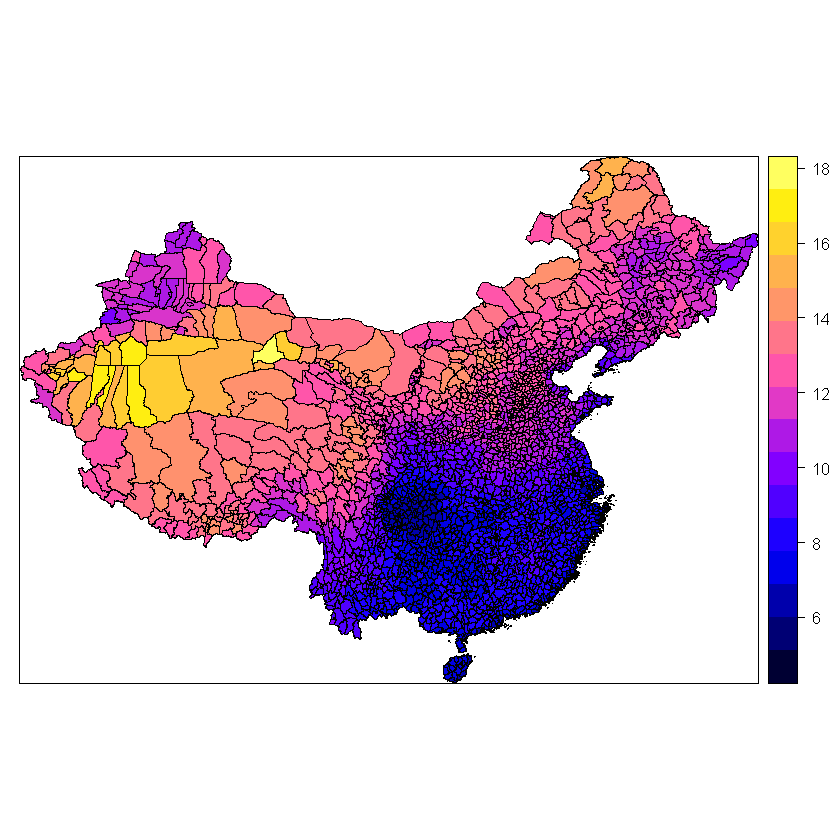

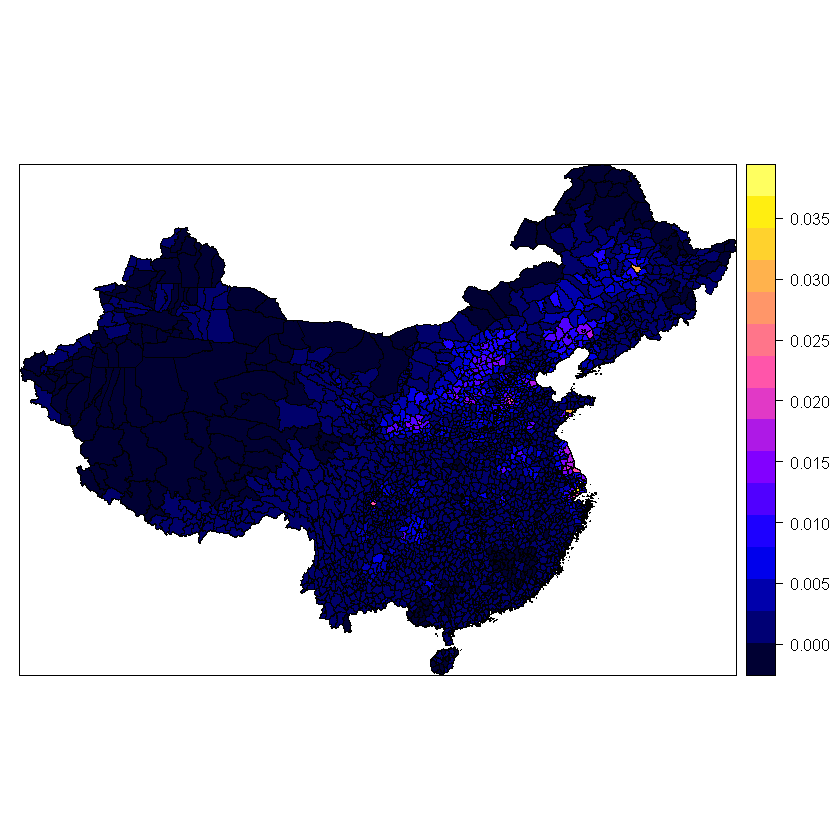

In [182]:
# Finally, visualise some of the data:
#spplot(china['BIO_1'] )
spplot(china['BIO_02'] )
spplot(china['HarvestAreaFraction'] )

In [ ]:
log(china@data$HrvstAF)

In [270]:
china@data$HrvstAF_log<-log(china@data$HarvestAreaFraction)

In [273]:
colnames(china@data)

[1] "ID_0"                       "ISO"                       
 [3] "NAME_0"                     "ID_1"                      
 [5] "NAME_1"                     "ID_2"                      
 [7] "NAME_2"                     "ID_3"                      
 [9] "NAME_3"                     "TYPE_3"                    
[11] "ENGTYPE_3"                  "NL_NAME_3"                 
[13] "VARNAME_3"                  "BIO_01"                    
[15] "BIO_02"                     "BIO_03"                    
[17] "BIO_04"                     "BIO_05"                    
[19] "BIO_06"                     "BIO_07"                    
[21] "BIO_08"                     "BIO_09"                    
[23] "BIO_10"                     "BIO_11"                    
[25] "BIO_12"                     "BIO_13"                    
[27] "BIO_14"                     "BIO_15"                    
[29] "BIO_16"                     "BIO_17"                    
[31] "BIO_18"                     "BIO_19"                    
[33] "HarvestAreaFraction"        "HarvestedAreasHectaresSum" 
[35] "HarvestedAreasHectaresMean" "ProductionSum"             
[37] "ProductionMean"             "YieldPerHectare"           
[39] "HrvstAF_log"